In [16]:
# OK, this only applies to the images in fro the SYSU dataset which are in color 
# I am going to intake all of the images from the data set, and put them into the 
# gray/images directory

# IMPORTANT NOTE
# When displaying the converted grayscale images with pyplot, they look like shit.
# all blue and everything. When actually written to a file, they look pristine and elegant and beautiful.


# Then I am going to go back to the crop_cars_sysu script, and re-crop them into this directory 
import numpy as np
import imageio as io
from matplotlib import pyplot as plt
import cv2
import os
import re
import operator
from glob import glob

ORIGINAL_IMG_DIR = '/home/jc/Desktop/SYSU_Nighttime/images'
OUTPUT_IMG_DIR = './gray_images/'


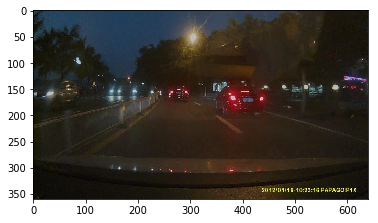

In [31]:

# Here we are just intaking the images, sorting them by their 
# file names, adn
#
img_paths = os.path.join(ORIGINAL_IMG_DIR, '*.jpg')
img_files = glob(img_paths)

num_imgs = len(img_files)

imgs = []

for i, f in enumerate(img_files):
     img = io.imread(f)
     imgs.append({'data': img, 'f': f})

for img in imgs:
    img['i'] = int(re.findall(r'\d+', img.get('f'))[0])

imgs.sort(key=operator.itemgetter('i'))

plt.imshow(imgs[0].get('data'))
plt.show()

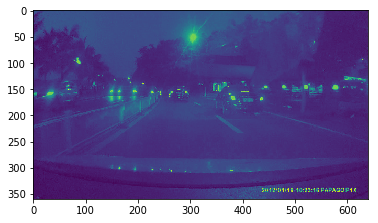

In [49]:
gray_imgs = []

for i, img in enumerate(imgs): 
    image = cv2.cvtColor(imgs[i].get('data'), cv2.COLOR_BGR2RGB)
    gray_imgs.append({'data': cv2.cvtColor(imgs[i].get('data'), cv2.COLOR_RGB2GRAY)})

plt.imshow(gray_imgs[0].get('data'))
plt.show()


In [52]:
for i, img in enumerate(gray_imgs):
    io.imwrite(OUTPUT_IMG_DIR + str(i) + '.jpg', img['data'])
